# Speed Estimation using Satellite Imagery
B. Salehi, Y. Zhang and M. Zhong, "Automatic Moving Vehicles Information Extraction From Single-Pass WorldView-2 Imagery," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, vol. 5, no. 1, pp. 135-145, Feb. 2012, doi: 10.1109/JSTARS.2012.2183117.

## Imports

In [69]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import torch
import random
import cv2
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.preprocessing import StandardScaler

## Global Variables

In [70]:
IMG_PATH = "/home/ah2719/FYP/Spatial_Finance_Transport/data/xView_example_image.PNG"
IMG_SIZE = 1024
N_COMPONENTS = 0.8

## Load Images
MS1 and MS2 Images

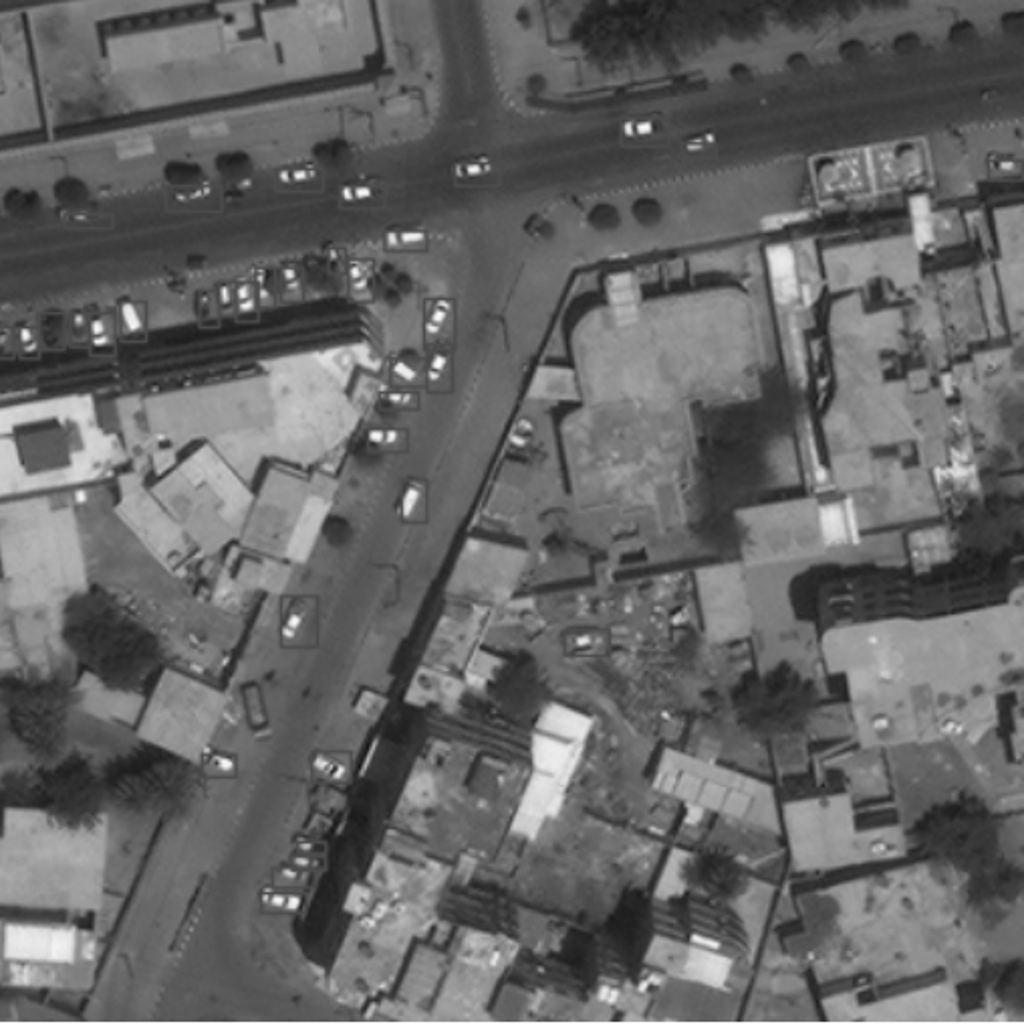

In [71]:
img = Image.open(IMG_PATH).convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE))
img.show()

## Preprocessing

In [72]:
img_arr = np.array(img)
img_arr = img_arr.astype(np.uint8)
img_arr = img_arr / 255

print(img_arr.shape)

(1024, 1024)


In [73]:
sc = StandardScaler()
sc.fit(img_arr)
img_arr = sc.transform(img_arr)

## Perform PCA

In [74]:
df_img = pd.DataFrame(img_arr)
df_img.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.986366,-1.000883,-1.069619,-1.093963,-1.111167,-1.107865,-1.099522,-1.085005,-1.073321,-1.063493,...,0.016939,-0.005684,0.005027,-0.005994,0.020454,0.019985,-0.007738,-0.038352,-0.072830,-0.074332
1,-0.986366,-1.000883,-1.069619,-1.093963,-1.111167,-1.107865,-1.099522,-1.085005,-1.073321,-1.063493,...,0.016939,-0.005684,0.005027,-0.005994,0.020454,-0.009334,-0.007738,-0.038352,-0.072830,-0.074332
2,-0.986366,-1.000883,-1.069619,-1.093963,-1.111167,-1.107865,-1.099522,-1.085005,-1.073321,-1.083596,...,-0.042260,-0.064780,-0.053473,-0.064172,-0.037970,-0.038652,-0.037196,-0.038352,-0.043259,-0.074332
3,-1.031975,-1.046690,-1.115558,-1.139745,-1.133715,-1.129816,-1.120896,-1.105829,-1.114088,-1.123800,...,-0.101459,-0.123875,-0.111974,-0.122349,-0.096395,-0.067971,-0.037196,-0.038352,-0.013688,-0.015282
4,-1.077584,-1.092498,-1.161498,-1.185527,-1.201358,-1.195668,-1.185017,-1.168301,-1.175239,-1.164005,...,-0.131059,-0.153422,-0.141224,-0.151438,-0.154819,-0.097290,-0.066654,-0.008802,0.015883,0.043769


In [75]:
img_pca = PCA(n_components=N_COMPONENTS)
img_pca.fit(img_arr)
proj_img = img_pca.transform(img_arr)

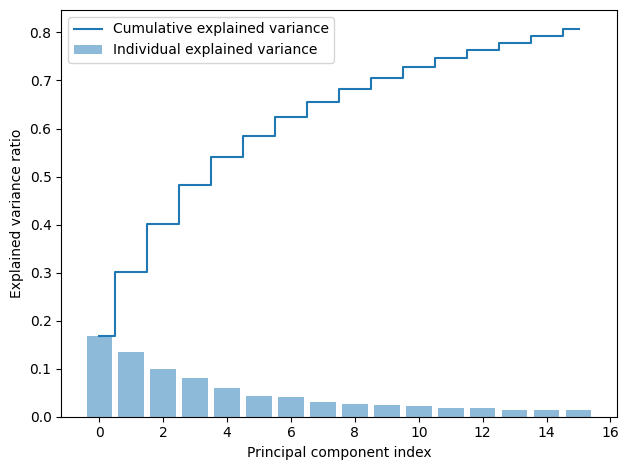

In [76]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = img_pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## PCA Components

In [77]:
# First get your first component
first_component = img_pca.components_[0]
# Make sure your first component is a row vector
first_component = first_component.reshape(1,-1) 

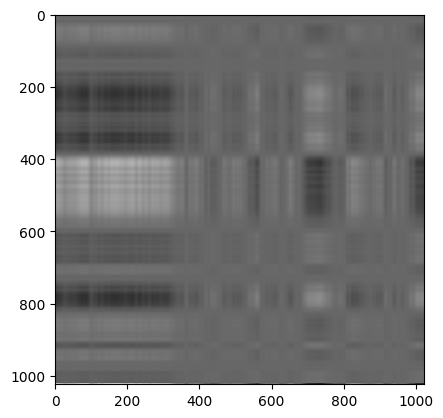

In [78]:
# get the first projection 
first_proj = proj_img[:,0]
# Make sure your first component is a column vector
first_proj = first_proj.reshape(-1,1)
# do inverse transform (No you have to add the mean as thse algorithm 
# works on zero mean data) 
recon_using_first_comp = np.dot(first_proj, first_component) + img_pca.mean_

plt.imshow(recon_using_first_comp, cmap='gray')

## PCA Components